**ANÁLISE E PREVISÃO DE VALORES DE APARTAMENTOS EM SP**

Este dataset contém entradas de um pouco mais de 13000 apartamentos à venda e para alugar na cidade de São Paulo e você poderá encontrá-lo no banco de dados do Kaggle, neste [link](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019).


O objetivo deste projeto será criar um modelo para prever valores de imóveis usando machine learning.

Antes disso, irei fazer uma análise exploratória dos dados para observar como cada atributo pode influenciar no preço do imóvel. 



In [ ]:
#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style='white', palette='crest') 

df = pd.read_csv("https://www.dropbox.com/s/h8blgaphkfpqsn5/sao-paulo-properties-april-2019.csv?dl=1")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#DIMENSÃO DO DATAFRAME
print('DIMENSÃO DF:')
print('LINHAS:', (df.shape[0]))
print('COLUNAS:', (df.shape[1]))


DIMENSÃO DF:
LINHAS: 13640
COLUNAS: 16


In [ ]:
#VISUALIZANDO AS 5 PRIMEIRAS ENTRADAS
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [ ]:
#VISUALIZANDO AS 5 ULTIMAS ENTRADAS
df.tail()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046
13639,161987,0,44,2,1,0,1,0,0,0,0,Jardim Ângela/São Paulo,sale,apartment,-23.613391,-46.523109


*Informação sobre os atributos:*


*   Price - Preço Imóvel
*   Condo - Valor Condomínio
*   Size - Tamanho Imóvel
*   Rooms - Quantidades de Quartos
*   Toilets - Quantidade de Banheiros
*   Suites - Quantidades de Suites
*   Elevator - Elevadores (Sim - 1/ Não - 0)
*   Furnished - Imobiliado (Sim - 1/ Não - 0)
*   Swimming Pool - Piscina (Sim - 1/ Não - 0)
*   New - Imóvel Novo (Sim - 1/ Não - 0)
*   District - Bairro
*   Negotiation Type - Tipo de negociação
    *   Rent - Aluguel
    *   Sale - Venda
*   Property Type - Tipo Propriedade (Ambos são apartamentos)
*   Latitude
*   Longitude















In [ ]:
#INFORMAÇÕES ESTATISTICAS
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [ ]:
#TIPO DAS VARIAVEIS
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [ ]:
#DADOS AUSENTES
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

Nas entradas do atributo District podemos perceber que todos os bairros estão acompanhandos com o nome da cidade (/São Paulo). 
Como os imóveis se tratam somente de São Paulo, irei remover isso das entradas afim de facilitar na análise.


In [ ]:
#ALTERANDO O ATRIBUTO DISTRICT
df['District'] = [d.replace('/São Paulo', '') for d in df['District']]

In [ ]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


In [ ]:
#INFORMAÇÕES ESTATISTICAS DAS VARIAVEIS CATEGORICAS
cat_data = df.select_dtypes(exclude=[np.number])
cat_data.describe()

,District,Negotiation Type,Property Type
count,13640,13640,13640
unique,96,2,1
top,Moema,rent,apartment
freq,293,7228,13640


Visualizando informações adicionais sobre o dataset:


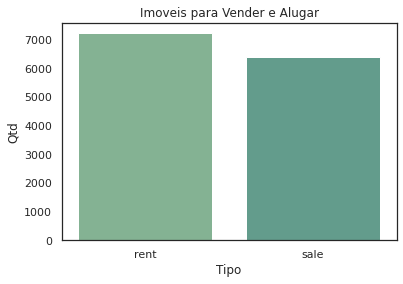

Valores detalhados:
rent    7228
sale    6412
Name: Negotiation Type, dtype: int64


In [ ]:
#QUANTIDADE DE IMOVEIS PARA VENDER E ALUGAR

sns.countplot(df['Negotiation Type'])
plt.title('Imoveis para Vender e Alugar')
plt.xlabel('Tipo')
plt.ylabel('Qtd')
plt.show()

print('Valores detalhados:')
print (df['Negotiation Type'].value_counts())

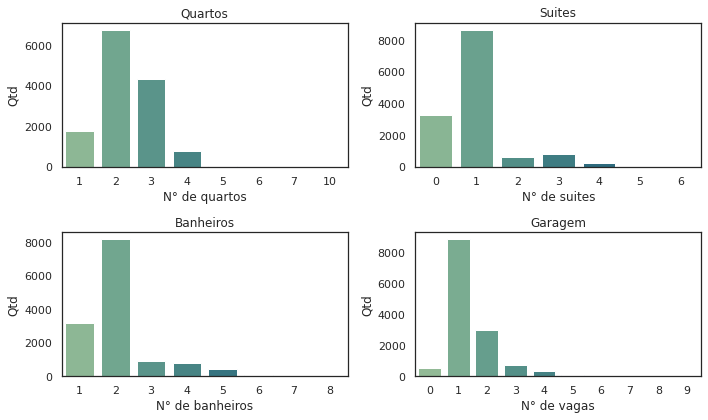

In [ ]:
fig, axes= plt.subplots(2,2, figsize=(10,6))

#QUANTIDADE DE QUARTOS POR IMOVEL
sns.countplot(df['Rooms'], ax=axes[0,0], palette='crest')
axes[0,0].set_title('Quartos')
axes[0,0].set_xlabel('N° de quartos')
axes[0,0].set_ylabel('Qtd')

#QUANTIDADE DE SUITES POR IMOVEL
sns.countplot(df['Suites'], ax=axes[0,1], palette='crest')
axes[0,1].set_title('Suites')
axes[0,1].set_xlabel('N° de suites')
axes[0,1].set_ylabel('Qtd')


#QUANTIDADE DE BANHEIROS POR IMOVEL
sns.countplot(df['Toilets'], ax=axes[1,0], palette='crest')
axes[1,0].set_title('Banheiros')
axes[1,0].set_xlabel('N° de banheiros')
axes[1,0].set_ylabel('Qtd')

#QUANTIDADE DE VAGAS DE GARAGEM DISPONIVEIS POR IMOVEL
sns.countplot(df['Parking'], ax=axes[1,1], palette='crest')
axes[1,1].set_title('Garagem')
axes[1,1].set_xlabel('N° de vagas')
axes[1,1].set_ylabel('Qtd')
plt.tight_layout()




In [ ]:
#QUANTIDADE DE IMOVEIS POR BAIRRO
df['District'].value_counts()

Moema              293
Mooca              288
Brás               255
Bela Vista         250
Brooklin           250
                  ... 
Jardim São Luis     44
São Rafael          44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

Como podemos ver o dataset possui no total imóvel em 96 bairros, vamos visualizar abaixo os 20 bairros com mais imóveis:

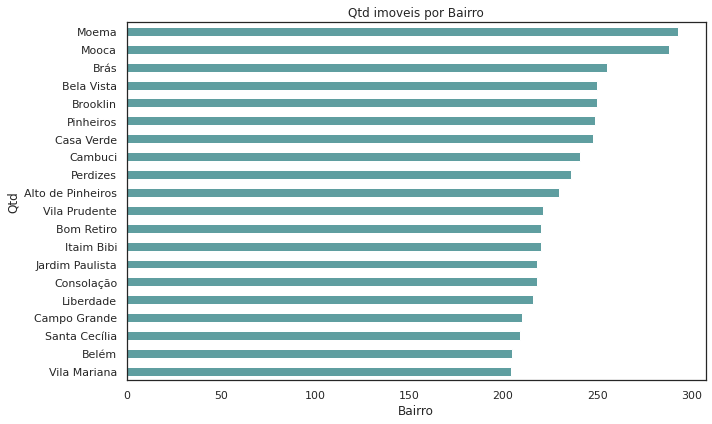

In [ ]:
#OS 20 BAIRROS COM MAIS IMOVEIS

fig, ax= plt.subplots(figsize=(10,6))
df['District'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh', color= 'cadetblue', ax=ax)
ax.set_title('Qtd imoveis por Bairro')
ax.set_xlabel('Bairro')
ax.set_ylabel('Qtd')
plt.tight_layout()

Para uma melhor análise, irei separar os imóveis para vendas dos imóveis para alugar:

In [ ]:
#SEPARANDO OS DADOS PELO TIPO DE NEGOCIAÇÃO - rent ou sale

df_rent = df[df['Negotiation Type'] == 'rent']
df_sale = df[df['Negotiation Type'] == 'sale']

Abaixo irei plotar um mapa de calor para vermos a correlação entre as variáveis para os imóveis à venda.

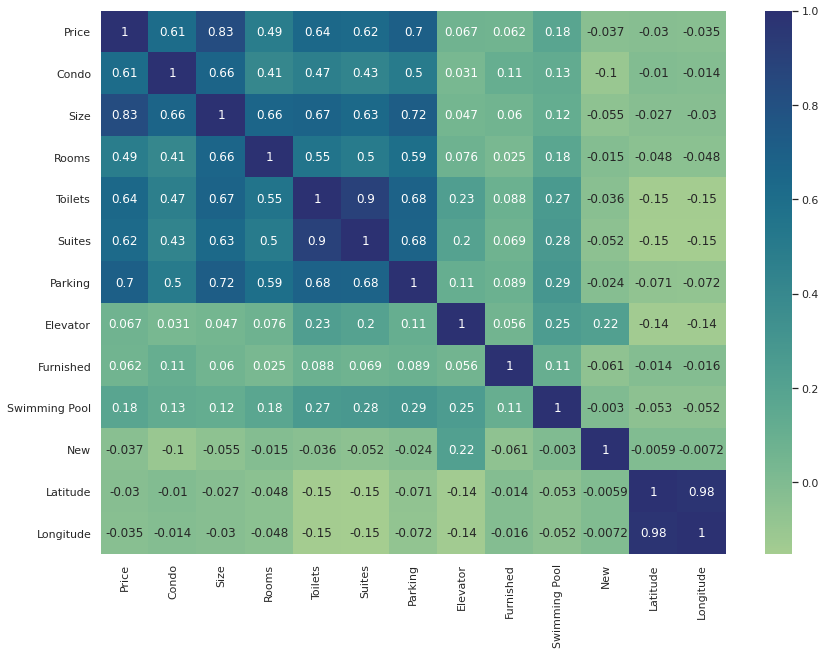

In [ ]:
#CORRELATION PLOT
plt.figure(figsize = (14,10))
sns.heatmap(df_sale.corr(), annot= True,  cmap= 'crest');

Aqui podemos ver que alguns atributos possuem uma correlação positiva com o valor de venda. 

Vamos visualizar esta relação entre eles em gráficos:

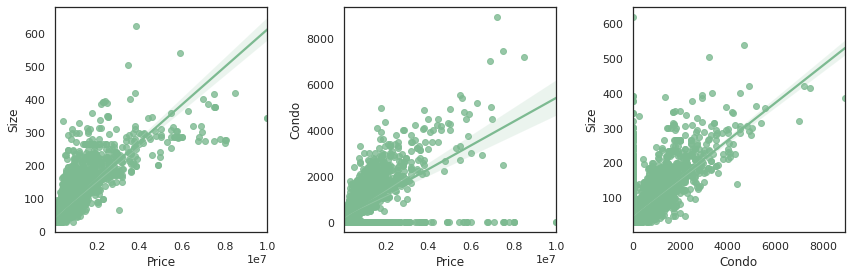

In [ ]:
fig,(ax1,ax2,ax3)= plt.subplots(ncols=3, nrows=1, figsize=(12,4))

#RELAÇÃO ENTRE PRICE E SIZE
sns.regplot(x='Price', y='Size', data=df_sale, ax=ax1)
ax1.set_xlabel('Price')
ax1.set_ylabel('Size')

#RELAÇÃO ENTRE PRICE E CONDO
sns.regplot(x='Price', y='Condo', data=df_sale, ax=ax2)
ax2.set_xlabel('Price')
ax2.set_ylabel('Condo')

#RELAÇÃO ENTRE PRICE E PARKING
sns.regplot(x='Condo', y='Size', data=df_sale, ax=ax3)
ax3.set_xlabel('Condo')
ax3.set_ylabel('Size')


plt.tight_layout();


Text(0, 0.5, 'Bairro')

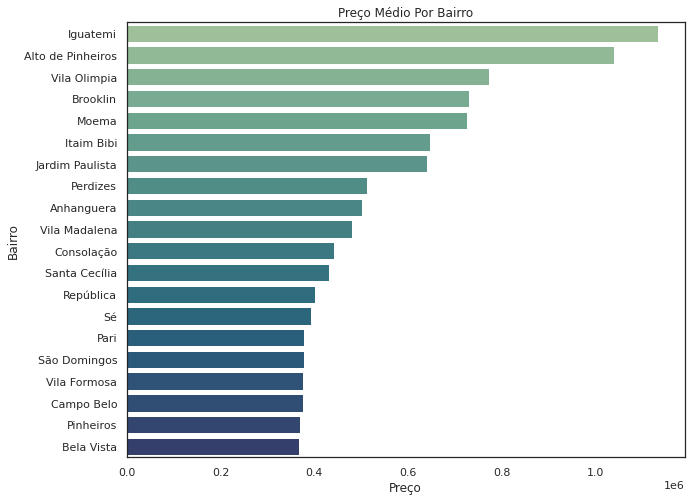

In [ ]:
#Media de Preço por Distrito
#.sort_values(ascending=False)
grupo = df.groupby('District')['Price'].mean().reset_index().sort_values(by= 'Price', ascending=False)[:20]

plt.figure(figsize = (10,8))
ax = sns.barplot(x='Price', y='District', data= grupo, palette='crest')
                
ax.set_title('Preço Médio Por Bairro')
ax.set_xlabel('Preço')
ax.set_ylabel('Bairro')


Preparando o conjunto de dados para criação do modelo de machine learning.
Aqui irei considerar novamente o conjunto de dados contendo dados de aluguéis e vendas. 

Irei excluir algumas colunas que não julgo necessárias para este modelo, e também irei alterar nome de duas variaveis somente por questão de código.


In [ ]:
#LIMPEZA E PREPARAÇAO DOS DADOS

#excluindo colunas Latitude, Longitude e Property Type
df_clean = df.copy()

df_clean.drop(['Latitude', 'Longitude', 'Property Type', 'Condo'], axis=1, inplace= True)   

#alterando nome de colunas Swimming Pool para Pool e Negotiation Type para Type
df_clean = df_clean.rename(columns={'Swimming Pool': 'Pool', 'Negotiation Type': 'Type'})


In [ ]:
df_clean.head()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Pool,New,District,Type
0,930,47,2,2,1,1,0,0,0,0,Artur Alvim,rent
1,1000,45,2,2,1,1,0,0,0,0,Artur Alvim,rent
2,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent
3,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent
4,1300,55,2,2,1,1,1,0,0,0,Artur Alvim,rent


Abaixo irei transformar as variáveis catégoricas em numéricas, pois alguns algoritmos de machine learning não aceitam esse tipo de variável.

In [ ]:
#TRANSFORMANDO AS VARIAVEIS DISTRICT E TYPE EM VARIAVEL NUMERICAS
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_clean['District']= le.fit_transform(df_clean['District'])

df_clean['Type']=le.fit_transform(df_clean['Type'])


In [ ]:
df_clean.head()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Pool,New,District,Type
0,930,47,2,2,1,1,0,0,0,0,3,0
1,1000,45,2,2,1,1,0,0,0,0,3,0
2,1000,48,2,2,1,1,0,0,0,0,3,0
3,1000,48,2,2,1,1,0,0,0,0,3,0
4,1300,55,2,2,1,1,1,0,0,0,3,0


In [ ]:
df_clean.tail()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Pool,New,District,Type
13635,265000,51,2,1,0,1,0,0,0,0,36,1
13636,545000,74,3,2,1,2,0,0,1,0,36,1
13637,515000,114,3,3,1,1,0,0,1,0,36,1
13638,345000,39,1,2,1,1,0,1,1,0,36,1
13639,161987,44,2,1,0,1,0,0,0,0,42,1


In [ ]:
df_clean.dtypes

Price        int64
Size         int64
Rooms        int64
Toilets      int64
Suites       int64
Parking      int64
Elevator     int64
Furnished    int64
Pool         int64
New          int64
District     int64
Type         int64
dtype: object

**CRIAÇÃO DO MODELO** - USANDO O ALGORITMO RANDOM FOREST REGRESSOR

In [ ]:
#CRIANDO O MODELO

#SEPARANDO AS VARIAVEIS EM x E y 
x= df_clean.drop('Price', axis=1)
y= df_clean['Price']


#DIVIDINDO OS DADOS EM TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

#INSTANCIANDO O MODELO
model= RandomForestRegressor(n_estimators=20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



In [ ]:
#METRICAS
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8796484185563099
69125.61280217623
54570109921.942505


In [ ]:
#SALVANDO O MODELO PARA CONSTRUÇÃO DO APP

import pickle 
with open('modelpredict.pkl', 'wb') as file:
  pickle.dump(model, file)